In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM

In [4]:
data=pd.read_csv("Iris.csv")

data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df=data[["SepalLengthCm",'SepalWidthCm']]

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [13]:
model=OneClassSVM(kernel='rbf',gamma=0.001,nu=0.1).fit(df)

In [14]:
y_pred=model.predict(df)

Here, nu stands for the estimated proportion of outliers we expect in this data. We have taken the estimation to be 5% which means that around 5% of the data is anomalous.

y_pred will assign all normal points to the class “1” and the outliers to “-1”.

In [15]:
anaomly_value=df.iloc[np.where(y_pred==-1)]
print(anaomly_value)

     SepalLengthCm  SepalWidthCm
6              4.6           3.4
8              4.4           2.9
13             4.3           3.0
15             5.7           4.4
22             4.6           3.6
38             4.4           3.0
41             4.5           2.3
42             4.4           3.2
60             5.0           2.0
105            7.6           3.0
117            7.7           3.8
118            7.7           2.6
122            7.7           2.8
130            7.4           2.8
131            7.9           3.8
135            7.7           3.0


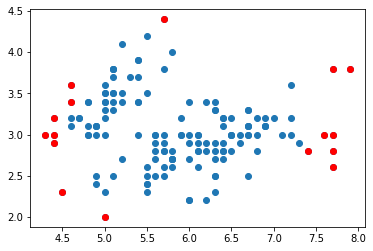

In [16]:
plt.scatter(df["SepalLengthCm"],df["SepalWidthCm"])
plt.scatter(anaomly_value["SepalLengthCm"],anaomly_value["SepalWidthCm"],c='r')

